<a href="https://colab.research.google.com/github/bayuazra23/bayuazra23.github.io/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
#download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip


--2020-07-30 17:07:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.47MB/s    in 34s     

2020-07-30 17:08:03 (9.10 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#extract dataset
import zipfile,os
local_zip= '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
#check directory
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [ ]:
pip install split-folders tqdm

In [ ]:
import split_folders
dataset_dir = '/tmp/rockpaperscissors/rps-cv-images'
split_folders.ratio(dataset_dir, output = '/tmp/rockpaperscissors', seed = 1337,
                    ratio=(.6, .4))

Copying files: 2188 files [00:00, 4051.29 files/s]


In [ ]:
train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
test_dir = os.path.join('/tmp/rockpaperscissors', 'val')

In [ ]:
rock_dir = os.path.join(dataset_dir, 'rock')
paper_dir = os.path.join(dataset_dir, 'paper')
scissors_dir = os.path.join(dataset_dir, 'scissors')


In [ ]:
#bagi tiap directory jadi train set dan test set
train_rock_dir, test_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, test_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, test_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
#assign variable untuk setiap train dan test set
train_rock = os.path.join(train_dir, 'rock')
test_rock = os.path.join(test_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
test_paper = os.path.join(test_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
test_scissors = os.path.join(test_dir, 'scissors')

In [ ]:
#augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')  

train_generator = train_datagen.flow_from_directory(
      train_dir, 
      target_size = (150, 150), 
      batch_size = 32,
      class_mode = 'categorical' 
      ) 

test_generator = test_datagen.flow_from_directory(
      test_dir,
      target_size = (150, 150),
      batch_size = 32,
      class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), #hidden layer
    tf.keras.layers.Dense(3, activation='softmax') #output layer
    ])

In [ ]:
#compiling, loss function, opitimizer
model.compile(loss='binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch = 25, #jumlah batch pada setiap epoch
      epochs = 20, #jumlah iterasi,
      validation_data = test_generator,
      validation_steps = 5,
      verbose = 1
)

Epoch 1/20
25/25 [==============================] - 7s 261ms/step - loss: 0.6314 - accuracy: 0.3800 - val_loss: 0.5464 - val_accuracy: 0.7000
Epoch 2/20
25/25 [==============================] - 6s 258ms/step - loss: 0.3816 - accuracy: 0.7475 - val_loss: 0.2450 - val_accuracy: 0.8625
Epoch 3/20
25/25 [==============================] - 6s 259ms/step - loss: 0.1843 - accuracy: 0.8963 - val_loss: 0.1947 - val_accuracy: 0.9125
Epoch 4/20
25/25 [==============================] - 6s 258ms/step - loss: 0.1930 - accuracy: 0.8975 - val_loss: 0.2038 - val_accuracy: 0.8938
Epoch 5/20
25/25 [==============================] - 6s 259ms/step - loss: 0.1735 - accuracy: 0.9038 - val_loss: 0.2456 - val_accuracy: 0.8687
Epoch 6/20
25/25 [==============================] - 7s 263ms/step - loss: 0.1610 - accuracy: 0.9150 - val_loss: 0.2698 - val_accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 7s 261ms/step - loss: 0.1181 - accuracy: 0.9438 - val_loss: 0.1103 - val_accuracy: 0.9312
Epoch 

Saving IMG_20200731_003244861.jpg to IMG_20200731_003244861 (2).jpg
IMG_20200731_003244861.jpg
rock


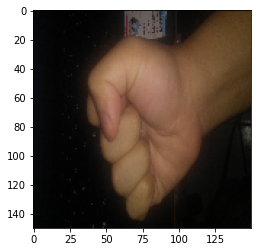

In [ ]:
uploaded = files.upload()
     
for fn in uploaded.keys():
     
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
      
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==2:
    print('scissors')